In [148]:
import numpy as np
import albumentations as A
from PIL import Image
import os
from tqdm.auto import tqdm
from pathlib import Path
from zipfile import ZipFile
import matplotlib.pyplot as plt
import warnings
import shutil
import logging
warnings.filterwarnings('ignore')

# Загрузка данных

Создадим папку images в которую будет извлечен zip-архив

In [2]:
os.getcwd()

'/home/c4/Рабочий стол/C4_M2'

In [3]:
Path('images').mkdir(exist_ok=True)

In [11]:
os.listdir()

['C4_M2.ipynb', '.ipynb_checkpoints', 'images']

Создадим в папке images папки train,test,val

Извлечем zip-архив в папку images

In [7]:
with ZipFile('/home/c4/Рабочий стол/C2_M2_Задание/Gauge.zip', 'r') as fzip:
    file_list = fzip.namelist()
    target_folders = [f for f in file_list if f.startswith('Gauge_big/test/') or f.startswith('Gauge_big/train/') or f.startswith('Gauge_big/val/')]

    with tqdm(total=len(file_list), desc='Извлечение файлов') as pbar:
        for file in file_list:
            fzip.extract(file, '/home/c4/Рабочий стол/C4_M2/images/')
            pbar.update(1)
    

Извлечение файлов:   0%|          | 0/27004 [00:00<?, ?it/s]

Посмотрим что лежит у нас в папке images

In [8]:
os.listdir('/home/c4/Рабочий стол/C4_M2/images/')

['val', 'train', 'Gauge_big', 'test']

Перенесем из папки Gauge_big данные в соответствующие папки

In [9]:
list_folder = ['train', 'test', 'val']

In [13]:
# Укажите пути к исходной и целевой папкам
source_folder = '/home/c4/Рабочий стол/C4_M2/images/Gauge_big/'
destination_folder = '/home/c4/Рабочий стол/C4_M2/images/'

# Получаем список всех файлов и папок в исходной папке
items = os.listdir(source_folder)

# Создаем прогресс-бар для отслеживания процесса
with tqdm(total=len(items), desc='Перемещение файлов') as pbar:
    for item in items:
        source_path = os.path.join(source_folder, item)
        destination_path = os.path.join(destination_folder, item)
        
        # Проверяем, является ли элемент файлом или папкой
        if os.path.isfile(source_path):
            shutil.move(source_path, destination_path)  # Перемещаем файл
        elif os.path.isdir(source_path):
            shutil.move(source_path, destination_folder)  # Перемещаем папку
        pbar.update(1)  # Обновляем прогресс-бар

print("Перемещение завершено.")  

Перемещение файлов:   0%|          | 0/3 [00:00<?, ?it/s]

Перемещение завершено.


Посмотрим на наш каталог images

In [14]:
os.listdir('/home/c4/Рабочий стол/C4_M2/images')

['val', 'train', 'Gauge_big', 'test']

Удалим папку Gauge_big

Проверим что папка создалась

In [16]:
os.rmdir('/home/c4/Рабочий стол/C4_M2/images/Gauge_big')

In [17]:
os.listdir('/home/c4/Рабочий стол/C4_M2/images')

['val', 'train', 'test']

# Предварительная обработка

Создадим директорию preprocessed_images 

In [18]:
os.getcwd()

'/home/c4/Рабочий стол/C4_M2'

In [19]:
Path('preprocessed_images').mkdir(exist_ok=True)

In [41]:
Path('/home/c4/Рабочий стол/C4_M2/preprocessed_images/train').mkdir(exist_ok=True)
Path('/home/c4/Рабочий стол/C4_M2/preprocessed_images/test').mkdir(exist_ok=True)
Path('/home/c4/Рабочий стол/C4_M2/preprocessed_images/val').mkdir(exist_ok=True)

Создадим папки в папках train,test,val в preprocessed_images

In [51]:
test_dir = os.listdir('/home/c4/Рабочий стол/C4_M2/images/test')
train_dir = os.listdir('/home/c4/Рабочий стол/C4_M2/images/train')
val_dir = os.listdir('/home/c4/Рабочий стол/C4_M2/images/val')

Посмотрим какое количество папок в папке test

In [53]:
len(test_dir)

1000

In [56]:
for file in test_dir:
    Path(f'/home/c4/Рабочий стол/C4_M2/preprocessed_images/test/{file}').mkdir(exist_ok=True)


In [195]:
for file in train_dir:
    Path(f'/home/c4/Рабочий стол/C4_M2/preprocessed_images/train/{file}').mkdir(exist_ok=True)


for file in val_dir:
    Path(f'/home/c4/Рабочий стол/C4_M2/preprocessed_images/val/{file}').mkdir(exist_ok=True)

Напишем функцию которая
1. Загружает изображение
2. Преобразовывает размер к размеру 224x224x3
3. Преобразовывает к оттенку серого
4. Сохраняет изображение в директорию preprocessed_images поддиректорию с таким же именем 

In [61]:
def preprocessed(path):
    name = path.split('/')
    name[5] = 'preprocessed_images'
    path_new = '/'.join(name)
    Image.open(path).resize((224,224)).convert('L').save(path_new)

In [190]:
for root, dirs, files in os.walk('/home/c4/Рабочий стол/C4_M2/images/train'):
    for file in files:
        full_path = os.path.join(root, file)
        preprocessed(full_path)


Перенесем данные из test и val без изменения

In [185]:
shutil.copytree('/home/c4/Рабочий стол/C4_M2/images/test', '/home/c4/Рабочий стол/C4_M2/preprocessed_images/test')

'/home/c4/Рабочий стол/C4_M2/preprocessed_images/test'

In [186]:
shutil.copytree('/home/c4/Рабочий стол/C4_M2/images/val', '/home/c4/Рабочий стол/C4_M2/preprocessed_images/val')

'/home/c4/Рабочий стол/C4_M2/preprocessed_images/val'

# Функция предобработки для всех изображений

Напишем функцию, которая поворачивает и случайно добавляет черный прямоугольник в диапазоне от 20 до 50 пикселей

In [128]:
def mask_random_rectangle(image_path):
    # Открываем изображение и преобразуем его в массив NumPy
    img = Image.open(image_path)
    img_arr = np.array(img)

    # Проверяем количество измерений изображения
    if img_arr.ndim == 2:  # Если изображение в градациях серого
        height, width = img_arr.shape
        is_gray = True
    elif img_arr.ndim == 3:  # Если изображение цветное (RGB)
        height, width, _ = img_arr.shape
        is_gray = False
    else:
        raise ValueError("Неизвестный формат изображения")

    # Генерируем случайные размеры прямоугольника в диапазоне от 20 до 50 пикселей
    rect_height = np.random.randint(20, 51)
    rect_width = np.random.randint(20, 51)

    # Генерируем случайные координаты для размещения прямоугольника
    y1 = np.random.randint(0, height - rect_height)
    x1 = np.random.randint(0, width - rect_width)

    # Заполняем выбранный прямоугольник черным цветом
    if is_gray:
        img_arr[y1:y1 + rect_height, x1:x1 + rect_width] = 0  # Черный цвет для градаций серого
    else:
        img_arr[y1:y1 + rect_height, x1:x1 + rect_width] = [0, 0, 0]  # Черный цвет для RGB

    return img_arr.astype(np.uint8)  # Убедитесь, что возвращаемый массив имеет тип uint8

In [178]:
def aug(path, show_results=True):
    img = Image.open(path)
    img_arr = np.array(img)
    transform = A.Rotate(limit=(-15,15), p=1)
    path_new = '.'.join(path.split('.')[0:-1])
    if os.path.exists(path_new + '_tilted.jpg'):
        logging.warning('Аугментация уже применена!!!')
        
    
    if os.path.exists(path_new + '_corrupted.jpg'):
        logging.warning('Аугментация уже применена!!!')
    
    if show_results:
        plt.subplot(131)
        plt.imshow(img_arr, cmap='gray')
        
        
        plt.subplot(132)
        plt.imshow(transform(image=img_arr)['image'], cmap='gray')


        plt.subplot(133)
        plt.imshow(mask_random_rectangle(path), cmap='gray')

        plt.tight_layout()
        plt.show()

    else:
        if not os.path.exists(path_new + '_tilted.jpg'):  # Сохраняем только если файл не существует
            Image.fromarray(transform(image=img_arr)['image']).save(path_new + '_tilted.jpg')
        
        if not os.path.exists(path_new + '_corrupted.jpg'):  # Сохраняем только если файл не существует
            Image.fromarray(mask_random_rectangle(path)).save(path_new + '_corrupted.jpg')
        

In [159]:
q = '/home/c4/Рабочий стол/C4_M2/preprocessed_images/test/0-00/gauge_rotated_7_jpg.rf.3deee732ce0baff5a136fafaabde01aa.jpg'

In [160]:
'.'.join(q.split('.')[:-1])

'/home/c4/Рабочий стол/C4_M2/preprocessed_images/test/0-00/gauge_rotated_7_jpg.rf.3deee732ce0baff5a136fafaabde01aa'

In [161]:
aug(q,show_results=False)

# Выполнение аугментациии

Применим к изображению из папки train для каждого класса аугментацию

In [179]:
def select_one_file_from_subfolders(directory):
    # Проходим по всем подкаталогам и файлам в заданной директории
    for root, dirs, files in os.walk(directory):
        if files:  # Проверяем, есть ли файлы в текущем каталоге
            # Выбираем первый файл из списка файлов
            selected_file = files[0]
            full_path = os.path.join(root, selected_file)
            aug(full_path, show_results=False)

# Пример использования
directory_path = '/home/c4/Рабочий стол/C4_M2/preprocessed_images/train'  # Укажите путь к вашей директории
select_one_file_from_subfolders(directory_path)

Применим на двух примерах функционал отрисовки графиков

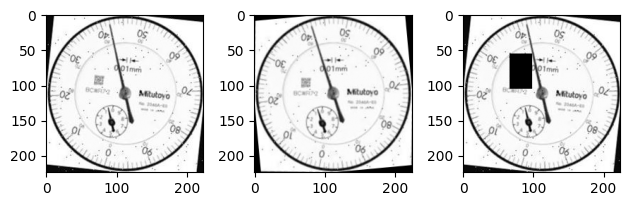

In [196]:
aug('/home/c4/Рабочий стол/C4_M2/preprocessed_images/train/0-42/gauge_rotated_1_jpg.rf.1ad6c9de3d9da6cb15fad716c2a7797b.jpg', show_results = True)

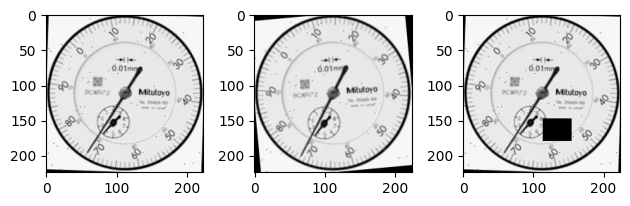

In [198]:
aug('/home/c4/Рабочий стол/C4_M2/preprocessed_images/train/3-72/gauge_rotated_7_jpg.rf.729bde641ad8689f477f2959d1aa1cc8.jpg', show_results=True)

Попробуем еще раз повторить аугментацию

In [200]:
aug('/home/c4/Рабочий стол/C4_M2/preprocessed_images/train/3-72/gauge_rotated_7_jpg.rf.729bde641ad8689f477f2959d1aa1cc8.jpg',
    show_results=False)

# Формирование итогового датасета

Создадим архив

In [201]:
source_directory = '/home/c4/Рабочий стол/C4_M2/preprocessed_images'  # Путь к папке
output_zip = '/home/c4/Рабочий стол/C4_M2/preprocessed_images'  # Путь и имя архива (без расширения)

# Создание ZIP-архива
shutil.make_archive(output_zip, 'zip', source_directory)
print(f"Папка {source_directory} успешно заархивирована в {output_zip}.zip")

Папка /home/c4/Рабочий стол/C4_M2/preprocessed_images успешно заархивирована в /home/c4/Рабочий стол/C4_M2/preprocessed_images.zip


Структурный вид датасета

dataset/
│
├── train/            #Тренировочные данные
│   ├── class/      # Различные классы изображений
│   
│
├── test/                 # Тестовые данные
│   ├── class       # Различные классы изображений
│  
│
└── val/                 # Данные для валидации
    ├──class       # Различные классы изображений
   


# Вывод

В ходе работы модуля 2 были проделаны следующие шаги:
1. Разархивирован файл zip с изображениями
2. Для тренировочных данных была произведена предобработка данных, а именно: уменьшение размера до (224,224) и преобразование в серый цвет
3. Создана функция аугментации которая выбранные картинки поворачивает на определнный угол в диапазоне (-15,15).Вторая аугментация случайным образом закрашивала в черный прямоугольник часть изображения (ширина и высота прямоугольника меняется в диапазоне от 20 до 50 пикселей)
4. К тренировочным данным каждому классу была применена аугментация
5. Обработанные данные были заархивированы